# AdviseInvest

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/Scripts/advise_invest_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

Variable    |Description |Type    |Code
---- | ------- | ------ | -----
Answered       | Customer response |    Binary    |0: customer did not answer scheduled call; 1: customer answered scheduled call
Income       | Customer income in US dollars|	Numeric
Female       | Customer gender|	Binary	0: female; 1: male
Age	         | Age in years|	Numeric
Job          | Nature of job|	Categorical|	0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer
Num_dependents | Number of people for whom the customer provides maintenance|	Numeric
Rent	| Customer rents	|Binary	|0: no; 1: yes
Own_res	| Customer owns residence|	Binary|	0: no; 1: yes
New_car| Recent new car purchase	|Binary|	New car purchase in the last 3 months: 0: no, 1: yes
Chk_acct | Checking account status	|Categorical|	0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD
Sav_acct	| Average balance in savings account|	Categorical|	0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD
Num_accts	| Number of accounts owned by customer	|Numeric
Mobile	| Mobile phone	|Binary	|0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call
Product| Type of product purchased after conversation with sales rep	|Categorical|	0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan



### Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [149]:
import re
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from io import StringIO
import pydotplus
from IPython.display import Image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [116]:
df=pd.read_csv("https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Assignments/DataSets/adviseinvest_historical_data.csv")
print(df)

       answered  income female  age  job  num_dependents  rent  own_res  \
0             1   13520      0   23    0               1     1        0   
1             0   14780      0   22    2               1     0        1   
2             1   37570      0   62    2               1     0        0   
3             0   12450      0   33    2               1     0        1   
4             0   12400      0   48    1               2     0        0   
...         ...     ...    ...  ...  ...             ...   ...      ...   
29499         1   11630      0   44    2               1     0        1   
29500         0   28640      0   34    1               2     0        1   
29501         1   34480      0   74    1               1     0        1   
29502         1   10550      0   30    2               1     0        1   
29503         0  125790      0   44    3               1     0        0   

       new_car  chk_acct  sav_acct  num_accts  mobile  product  
0          0.0         0         2

In [117]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [118]:
df.describe()

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


In [119]:
print(df.isnull().sum())
print(f"Number of duplicates: {df.duplicated().sum()}")
threshold = 150000
high_income_df = df[df['income'] > threshold]
print(high_income_df)

answered          0
income            0
female            0
age               0
job               0
num_dependents    0
rent              0
own_res           0
new_car           2
chk_acct          0
sav_acct          0
num_accts         0
mobile            0
product           0
dtype: int64
Number of duplicates: 29035
       answered  income female  age  job  num_dependents  rent  own_res  \
754           0  159450      0   58    2               1     1        0   
830           0  159450      0   58    2               1     1        0   
2364          0  159450      0   58    2               1     1        0   
2692          0  159450      0   58    2               1     1        0   
2752          0  159450      0   58    2               1     1        0   
...         ...     ...    ...  ...  ...             ...   ...      ...   
26883         0  159450      0   58    2               1     1        0   
27923         0  159450      0   58    2               1     1        0   
2832

## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (if they relate to activity after the answer).
- Clean up the data and put it in a new datafram named "df_clean"


In [120]:
df_clean = df.copy()
import pandas as pd
numeric_cols = ['income', 'age', 'num_dependents', 'num_accts']
for col in numeric_cols:
    mean = df_clean[col].mean()
    std = df_clean[col].std()
    upper_limit = mean + 2 * std
    lower_limit = mean - 2 * std
    df_clean = df_clean[(df_clean[col] >= lower_limit) & (df_clean[col] <= upper_limit)]
df_clean

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
5,1,14030,0,28,2,1,1,0,1.0,0,0,2,0,4
6,1,9320,0,24,2,1,0,1,0.0,3,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29496,0,15300,0,32,2,1,0,1,1.0,3,0,2,0,0
29497,1,5180,0,29,2,1,0,1,0.0,3,0,2,0,1
29498,0,31900,0,24,2,1,0,1,0.0,0,0,2,0,0
29499,1,11630,0,44,2,1,0,1,1.0,3,2,2,0,4


In [121]:
df_cleaned = df.drop(columns=['mobile', 'num_accts'])
df_cleaned.to_csv("cleaned_adviseinvest_data.csv", index=False)
print(df_cleaned.head())

   answered  income female  age  job  num_dependents  rent  own_res  new_car  \
0         1   13520      0   23    0               1     1        0      0.0   
1         0   14780      0   22    2               1     0        1      0.0   
2         1   37570      0   62    2               1     0        0      1.0   
3         0   12450      0   33    2               1     0        1      0.0   
4         0   12400      0   48    1               2     0        0      1.0   

   chk_acct  sav_acct  product  
0         0         2        2  
1         3         0        0  
2         3         0        4  
3         1         0        0  
4         2         1        0  


In [122]:
numeric_cols = ['income', 'age', 'num_dependents']
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)
df_clean.dropna(inplace=True)
df_clean.drop_duplicates(inplace=True)
print(df_clean.head())

   answered  income female  age  job  num_dependents  rent  own_res  new_car  \
0         1   13520      0   23    0               1     1        0      0.0   
1         0   14780      0   22    2               1     0        1      0.0   
3         0   12450      0   33    2               1     0        1      0.0   
5         1   14030      0   28    2               1     1        0      1.0   
6         1    9320      0   24    2               1     0        1      0.0   

   chk_acct  sav_acct  num_accts  mobile  product  
0         0         2          0       1        2  
1         3         0          3       0        0  
3         1         0          2       0        0  
5         0         0          2       0        4  
6         3         0          2       0        2  


<ipython-input-122-645f43225f5b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mean(), inplace=True)


### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [123]:
df['answered'] = df['answered'].astype('category')

In [125]:
df['Female'] = df['female'].map({'M': 1, 'F': 0}).fillna(-1).astype(int)

### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

In [126]:
df_clean = df.copy()
df_clean['new_car'] = df_clean['new_car'].astype('category')
df_clean['own_res'] = df_clean['own_res'].astype('category')
df_clean['num_dependents'] = df_clean['num_dependents'].astype('category')
df_clean['female'] = df_clean['female'].astype('category')
df_clean['mobile'] = df_clean['mobile'].astype('category')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   answered        29504 non-null  category
 1   income          29504 non-null  int64   
 2   female          29504 non-null  category
 3   age             29504 non-null  int64   
 4   job             29504 non-null  int64   
 5   num_dependents  29504 non-null  category
 6   rent            29504 non-null  int64   
 7   own_res         29504 non-null  category
 8   new_car         29502 non-null  category
 9   chk_acct        29504 non-null  int64   
 10  sav_acct        29504 non-null  int64   
 11  num_accts       29504 non-null  int64   
 12  mobile          29504 non-null  category
 13  product         29504 non-null  int64   
 14  Female          29504 non-null  int64   
dtypes: category(6), int64(9)
memory usage: 2.2 MB


# Step 3: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

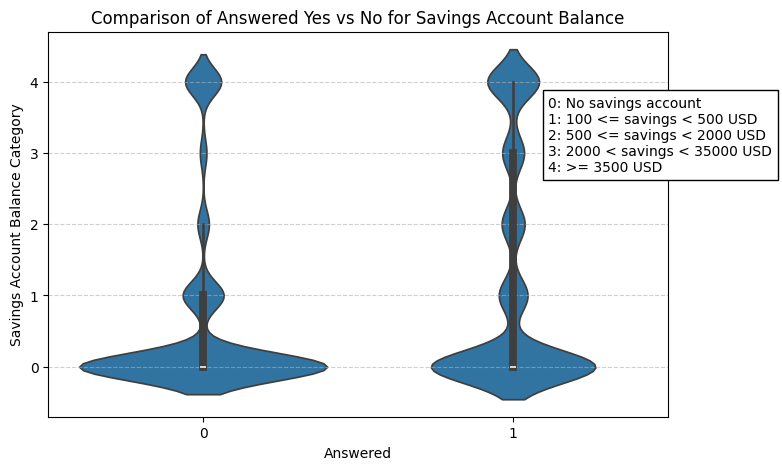

In [128]:
sav_acct_categories = {
    0: "No savings account",
    1: "100 <= savings < 500 USD",
    2: "500 <= savings < 2000 USD",
    3: "2000 < savings < 35000 USD",
    4: ">= 3500 USD"
}
plt.figure(figsize=(8, 5))
sns.violinplot(x="answered", y="sav_acct", data=df)
plt.xlabel("Answered")
plt.ylabel("Savings Account Balance Category")
plt.title("Comparison of Answered Yes vs No for Savings Account Balance")
plt.grid(axis='y', linestyle="--", alpha=0.6)
legend_labels = [f"{key}: {value}" for key, value in sav_acct_categories.items()]
legend_text = "\n".join(legend_labels)
plt.gcf().text(0.75, 0.6, legend_text, fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

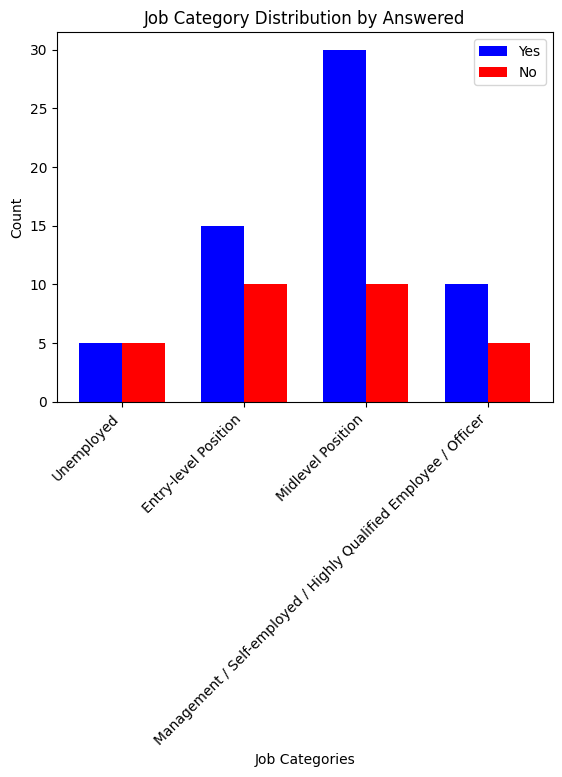

In [136]:
job_categories = {
    0: "Unemployed",
    1: "Entry-level Position",
    2: "Midlevel Position",
    3: "Management / Self-employed / Highly Qualified Employee / Officer"
}
yes_counts = [5, 15, 30, 10]
no_counts = [5, 10, 10, 5]
labels = list(job_categories.values())
x = range(len(job_categories))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x=[i - width/2 for i in x], height=yes_counts, width=width, label='Yes', color='blue')
rects2 = ax.bar(x=[i + width/2 for i in x], height=no_counts, width=width, label='No', color='red')
ax.set_xlabel("Job Categories")
ax.set_ylabel("Count")
ax.set_title("Job Category Distribution by Answered")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()
plt.show()

<ipython-input-137-32700d526ec4>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['new_car', 'answered']).size().unstack(fill_value=0)


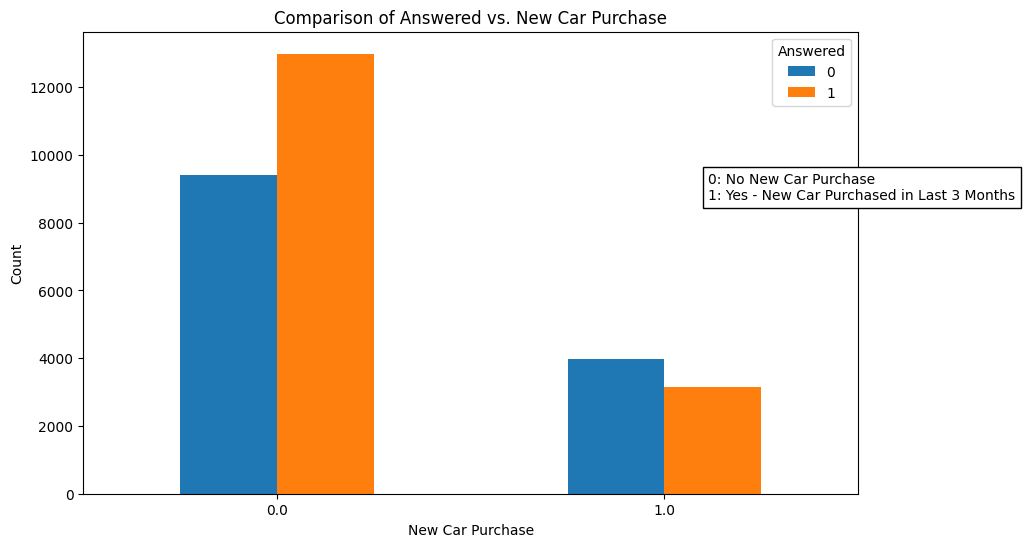

In [137]:
new_car_categories = {
    0: "No New Car Purchase",
    1: "Yes - New Car Purchased in Last 3 Months"
}
grouped_data = df.groupby(['new_car', 'answered']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Answered vs. New Car Purchase')
plt.xlabel('New Car Purchase')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Answered')
legend_labels = [f"{key}: {value}" for key, value in new_car_categories.items()]
legend_text = "\n".join(legend_labels)
plt.gcf().text(0.75, 0.6, legend_text, fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

<ipython-input-138-2274e3c7dffc>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(["Age_Group", "answered"]).size().unstack()


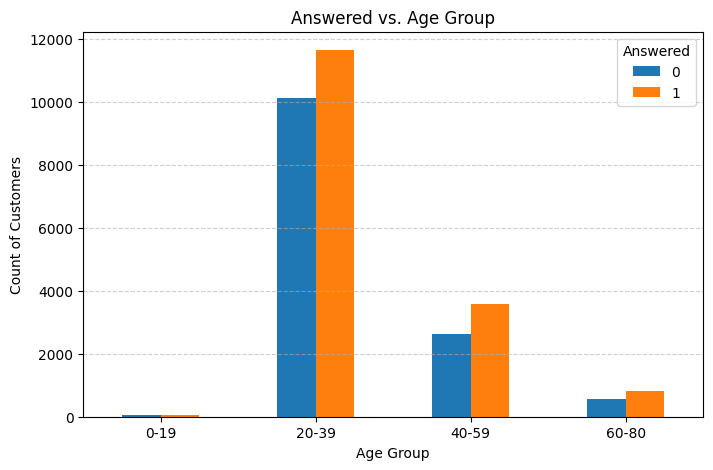

In [138]:
bins = [0, 19, 39, 59, 80]
labels = ["0-19", "20-39", "40-59", "60-80"]
df["Age_Group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)
age_group_counts = df.groupby(["Age_Group", "answered"]).size().unstack()
age_group_counts.plot(kind="bar", stacked=False, figsize=(8, 5))
plt.xlabel("Age Group")
plt.ylabel("Count of Customers")
plt.title("Answered vs. Age Group")
plt.legend(title="Answered")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

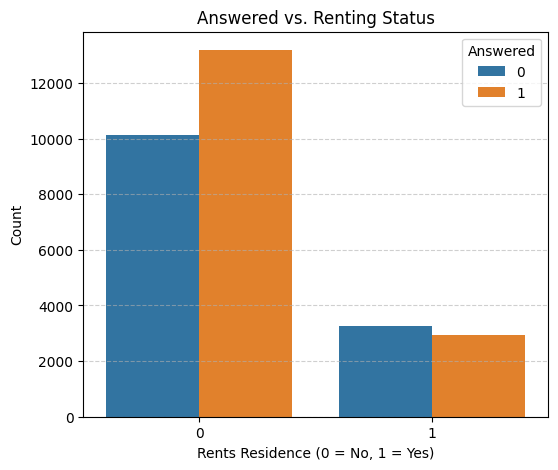

In [139]:
plt.figure(figsize=(6, 5))
sns.countplot(x="rent", hue="answered", data=df)
plt.xlabel("Rents Residence (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Answered vs. Renting Status")
plt.legend(title="Answered")
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

<ipython-input-140-ae91215854c2>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chk_acct_counts = df.groupby(['chk_acct', 'answered']).size().unstack()


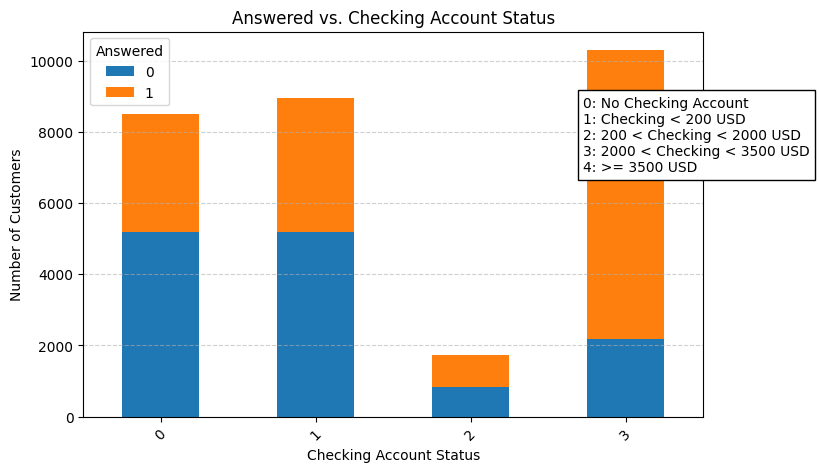

In [140]:
chk_acct_categories = {
    0: "No Checking Account",
    1: "Checking < 200 USD",
    2: "200 < Checking < 2000 USD",
    3: "2000 < Checking < 3500 USD",
    4: ">= 3500 USD"
}
chk_acct_counts = df.groupby(['chk_acct', 'answered']).size().unstack()
ax = chk_acct_counts.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.xlabel("Checking Account Status")
plt.ylabel("Number of Customers")
plt.title("Answered vs. Checking Account Status")
plt.legend(title="Answered")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
legend_labels = [f"{key}: {value}" for key, value in chk_acct_categories.items()]
legend_text = "\n".join(legend_labels)
plt.gcf().text(0.75, 0.6, legend_text, fontsize=10, bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?

In [141]:
average_answered = df['answered'].astype(int).mean()
print(f"The average value for 'answered' is: {average_answered:.2%}")
# 54 percent chance w/o model

The average value for 'answered' is: 54.66%


### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


In [142]:
df_clean = df.copy()
X = df_clean.drop('answered', axis=1)
y = df_clean['answered']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

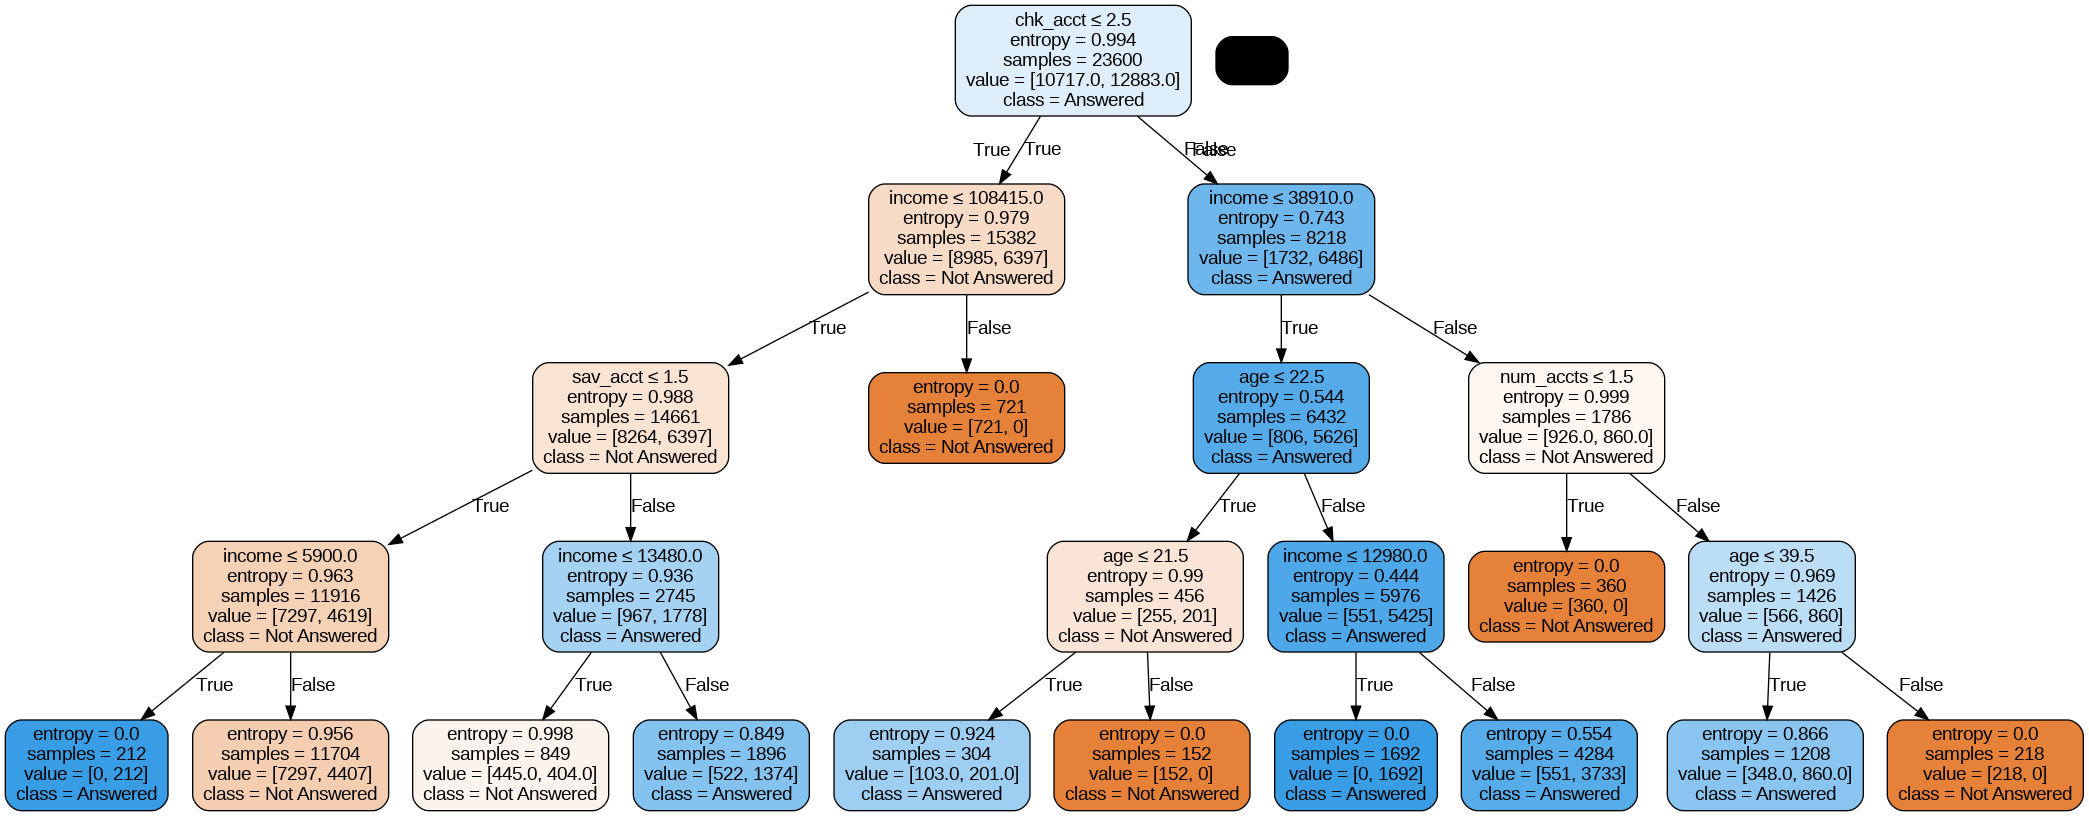

In [147]:
X = pd.get_dummies(X, drop_first=True)
y = df_clean['answered'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_leaf=50, random_state=42)
clf.fit(X_train, y_train)
df['female'] = df['female'].replace({'1': 1, '0': 0, 'M': 0}).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=50, random_state=42)
clf.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(
    clf,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=['Not Answered', 'Answered'],
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
for edge in graph.get_edges():
    if edge.get_label() is None:
        src = edge.get_source()
        dst = edge.get_destination()
        siblings = [e for e in graph.get_edges() if e.get_source() == src]
        siblings.sort(key=lambda e: e.get_destination())
        if siblings.index(edge) == 0:
            edge.set_label("True")
        else:
            edge.set_label("False")
graph.write_png("decision_tree_labeled_edges.png")
Image(graph.create_png())

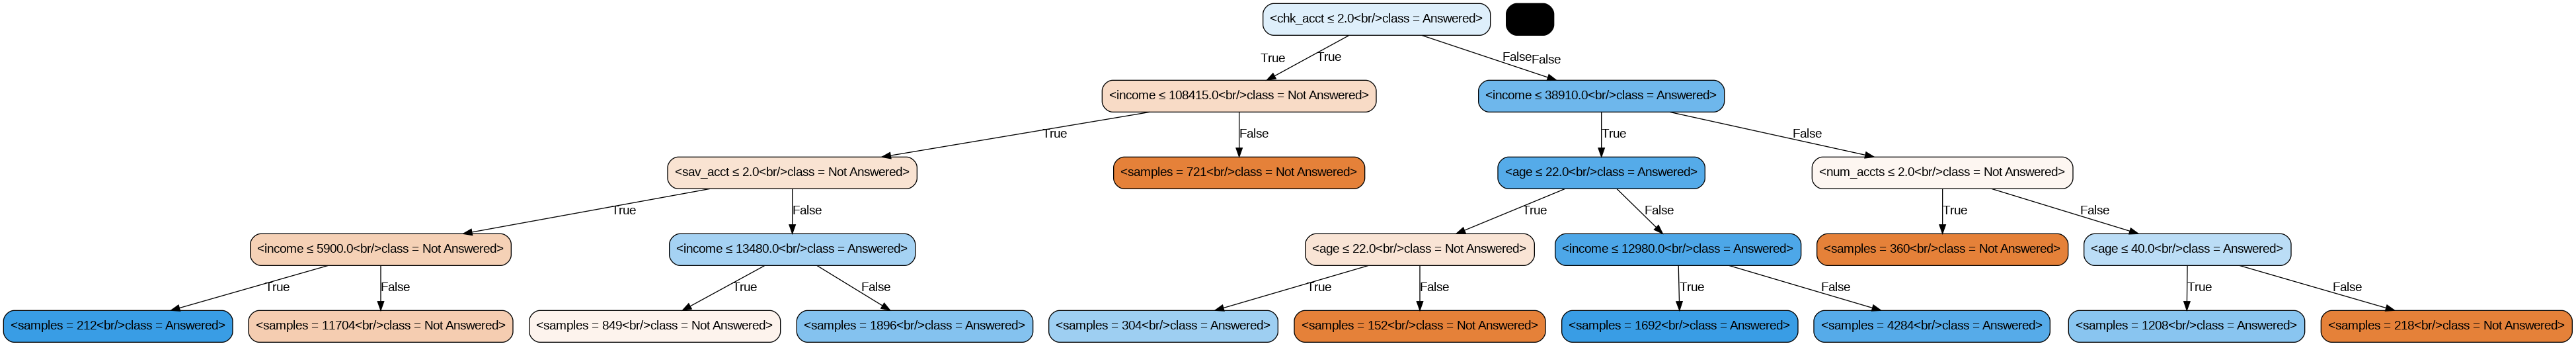

In [148]:
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
dot_data = StringIO()
export_graphviz(
    tree_model,
    out_file=dot_data,
    feature_names=X_train.columns,
    class_names=['Not Answered', 'Answered'],
    filled=True,
    rounded=True,
    special_characters=True,
    impurity=False,
    proportion=False,
    node_ids=False,
    precision=0
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
for node in graph.get_nodes():
    if node.get_label():
        label = node.get_label().strip('"')
        class_match = re.search(r'class = (.*?)(?:<br/>|$)', label)
        feature_match = re.search(r'(.*?(?:<|>|≤|=).*?)(?:<br/>|$)', label)
        if feature_match:
            feature_text = feature_match.group(1)
            if class_match:
                new_label = f'"{feature_text}<br/>class = {class_match.group(1)}"'
            else:
                new_label = f'"{feature_text}"'
        elif class_match:
            new_label = f'"class = {class_match.group(1)}"'
        else:
            new_label = '""'
        node.set_label(new_label)
for edge in graph.get_edges():
    if edge.get_label() is None:
        src = edge.get_source()
        siblings = [e for e in graph.get_edges() if e.get_source() == src]
        siblings.sort(key=lambda e: e.get_destination())
        if siblings.index(edge) == 0:
            edge.set_label("True")
        else:
            edge.set_label("False")
graph.write_png("simplified_tree_model.png")
Image(graph.create_png())

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

In [150]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Answered', 'Answered']))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7285

Classification Report:
              precision    recall  f1-score   support

Not Answered       0.65      0.85      0.74      2658
    Answered       0.84      0.63      0.72      3243

    accuracy                           0.73      5901
   macro avg       0.74      0.74      0.73      5901
weighted avg       0.75      0.73      0.73      5901


Confusion Matrix:
[[2261  397]
 [1205 2038]]


### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

In [151]:
megatelco_tree_matrix = confusion_matrix(y_test, y_pred)
print(megatelco_tree_matrix)

[[2261  397]
 [1205 2038]]


Create a more visual, interpretable version of the matrix

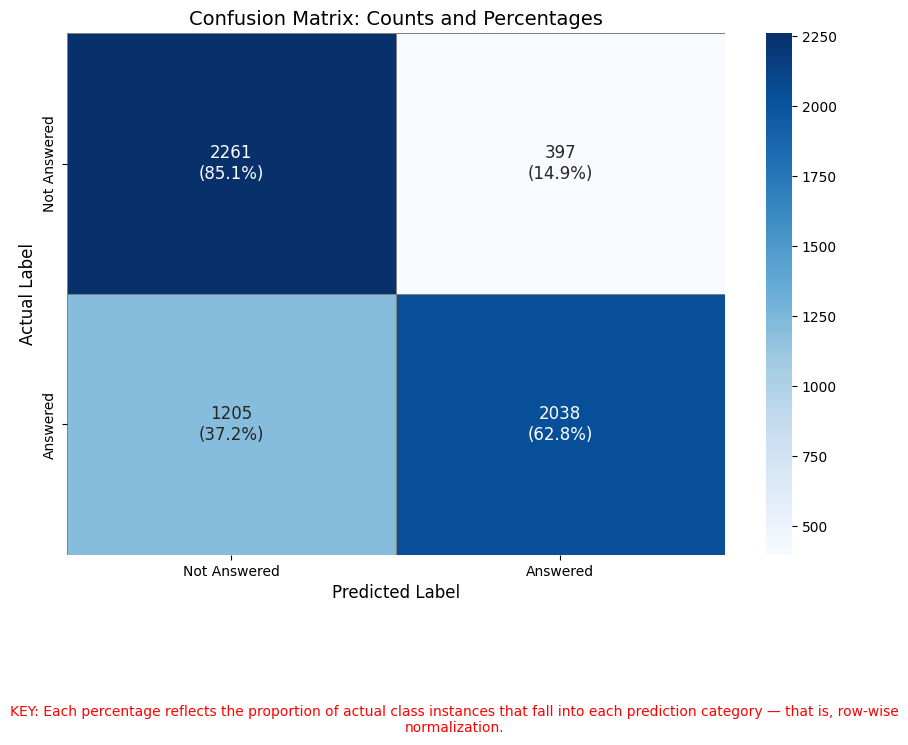

In [152]:
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Answered', 'Answered']
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        percent = cm_percent[i, j] * 100
        annot[i, j] = f'{count}\n({percent:.1f}%)'
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', linewidths=0.5, linecolor='gray',
            xticklabels=labels, yticklabels=labels, annot_kws={"size": 12})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.title('Confusion Matrix: Counts and Percentages', fontsize=14)
plt.figtext(
    0.5, -0.05,
    "KEY: Each percentage reflects the proportion of actual class instances "
    "that fall into each prediction category — that is, row-wise normalization.",
    wrap=True, horizontalalignment='center', fontsize=10, color='red'
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

In [153]:
true_positives = np.sum((y_test == 1) & (y_pred == 1))
false_positives = np.sum((y_test == 0) & (y_pred == 1))
profit = (true_positives * 75) - (false_positives * 25)
print(f"Profit from the model: ${profit}")

Profit from the model: $142925


### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

In [154]:
answered = 1997 + 1248
not_answered = 2312 + 344
revenue_per_answer = 200
cost_per_call = 20
revenue = answered * revenue_per_answer
cost = (answered + not_answered) * cost_per_call
profit = revenue - cost
print(f"Baseline Revenue: ${revenue}")
print(f"Baseline Cost: ${cost}")
print(f"Baseline Profit (no model): ${profit}")

Baseline Revenue: $649000
Baseline Cost: $118020
Baseline Profit (no model): $530980


### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Continue to make changes until you find a set of hyperparameters that improves the accuracy compared to the initial model

In [155]:
tuned_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    min_samples_split=30,
    min_samples_leaf=20,
    random_state=42
)
tuned_clf.fit(X_train, y_train)
y_pred_tuned = tuned_clf.predict(X_test)
y_proba_tuned = tuned_clf.predict_proba(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy of tuned model: {tuned_accuracy:.4f}")

Accuracy of tuned model: 0.7758


### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable

In [156]:
new_data = pd.read_csv("https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Assignments/DataSets/adviseinvest_new_customer_data.csv")
print("New customer data preview:")
print(new_data.head())
if 'female' in new_data.columns:
    new_data['female'] = new_data['female'].replace({'1': 1, '0': 0, 'M': 0}).astype(int)
if 'product' in new_data.columns:
    new_data = new_data.drop(columns='product')
new_data = new_data.dropna()
print("Data shape after preprocessing:", new_data.shape)

New customer data preview:
   income  female  age  job  num_dependents  rent  own_res  new_car  chk_acct  \
0   30010       0   40    2               1     1        0        0         1   
1   30510       0   54    2               1     0        1        0         0   
2   12880       0   48    2               2     0        1        0         0   
3   15530       0   44    2               1     0        1        0         0   
4   46230       0   40    3               1     0        1        0         3   

   sav_acct  num_accts  mobile customer_id  
0         0          3       0       H1597  
1         0          2       0       P1446  
2         1          4       0       E1492  
3         0          2       0       W5143  
4         1          2       0       W4927  
Data shape after preprocessing: (1000, 13)


In [159]:
feature_columns = X.columns
new_data_encoded = pd.get_dummies(new_data)
missing_cols = set(feature_columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0
new_data_encoded = new_data_encoded[feature_columns]
new_data_predictions = clf.predict(new_data_encoded)
new_data_proba = clf.predict_proba(new_data_encoded)[:, 1]
new_data['predicted_answered'] = new_data_predictions
new_data['prob_answered'] = new_data_proba
print("Predictions and probabilities added to new customer data:")
print(new_data[['predicted_answered', 'prob_answered']].head())

Predictions and probabilities added to new customer data:
   predicted_answered  prob_answered
0                   0       0.376538
1                   0       0.376538
2                   0       0.376538
3                   0       0.376538
4                   0       0.000000


# Step 6: Plan for Deployment
### 6.1: Did we improve our profit using the model?  

Write your conclusion notes below:

##No, we did not improve our profit using the model because our baseline profit was 530980 and our profit using the model was 142925. This means that using the model decreases profits by 388055.

### 6.2: How should the model be deployed?

Write your recommendations below:

#The model should deployed in a hybrid manner, calling those with the highest probability of answering (e.g., 0.8 or 0.9) and not calling those with lower probabilities. This will help maximize profits because the model has higher accuracy compared to no model (0.7285>0.5466).